In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

In [3]:
# Task 1
data = pd.read_csv("G:/Labs/bsuir-labs/11cem/ml/lab01/ex1data1.txt", header=None, sep=",", names=['Popularity', 'Profit'])

print(data.sort_values(by="Profit"))

    Popularity    Profit
74      5.0269  -2.68070
55      6.3589  -1.42110
30      5.2524  -1.22000
61      5.1793  -0.74279
94      8.2934   0.14454
88      5.5204   0.15200
81      5.1884   0.20421
75      6.5479   0.29678
80      5.7292   0.47953
40      5.4069   0.55657
17      5.1301   0.56077
96      5.4369   0.61705
82      6.3557   0.67861
14      5.6407   0.71618
87      6.0020   0.92695
68      5.4994   1.01730
49      5.5416   1.01790
45      7.0931   1.04630
72      6.0062   1.27840
54      6.3328   1.42330
51      5.3077   1.83960
47      5.8014   1.84400
90      5.7077   1.84510
33      5.8918   1.84950
93      5.3054   1.98690
79      5.1077   2.05760
43      5.7737   2.44060
56      6.2742   2.47560
89      5.0594   2.82140
24      5.5649   3.08250
..         ...       ...
44      7.8247   6.73180
50      7.5402   6.75040
78     10.2740   6.75260
86      9.1802   6.79810
4       5.8598   6.82330
27     10.9570   7.04670
92      5.8707   7.20290
13      8.4084   7.22580


Therory function blue line f(x)=1.5*x+-7


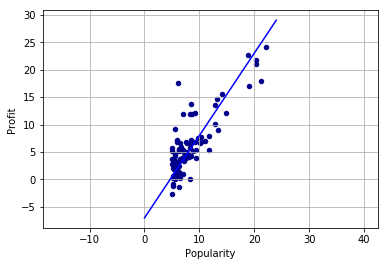

In [8]:
# Task 2
data.sort_values(by="Popularity").plot.scatter(x='Popularity', y='Profit', c='DarkBlue')
plt.grid()
plt.axis('equal')
x = range(0, 25, 1)
k = 1.5
b = -7
y = [i * k + b for i in x]
plt.plot(x, y, 'b-')

print("Therory function blue line f(x)=" + str(k) + "*x+" + str(b))

theroyes = [k * x_actual + b for x_actual in data.sort_values(by="Popularity").Popularity]

In [9]:

J = 0
for y_theory, y_actual in zip(theroyes, data.sort_values(by="Popularity").Profit):
    J += (y_theory - y_actual) ** 2
J /= 2 * len(theroyes)

# Task 3
print("Loss func J(theta)=" + str(round(J, 2)))

Loss func J(theta)=5.35


100%|█████████████████████████████████████████████████████████████████████████████| 1015/1015 [00:01<00:00, 626.16it/s]


[1.1830723774610155, -3.79662516696715]
213.44138834583958


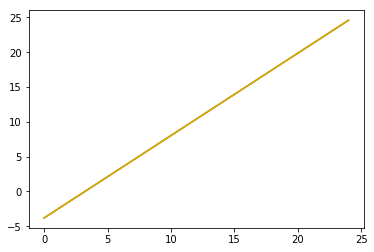

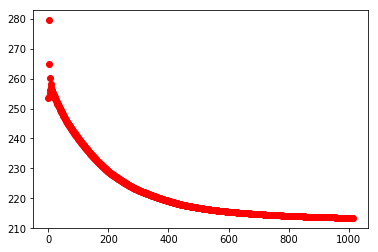

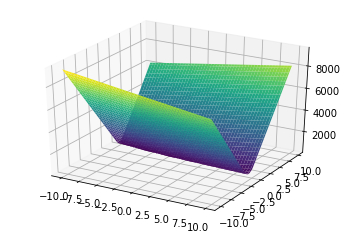

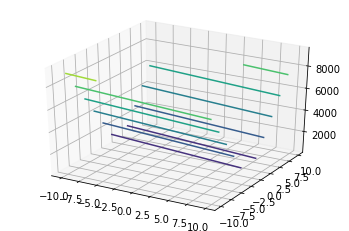

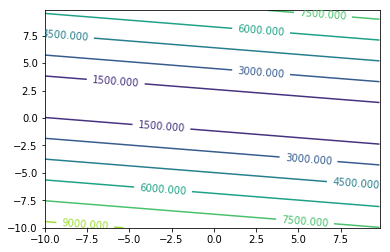

In [11]:

# Task 4


alpha = -0.01
tetha = [1, 0]
tetha_x = []
tetha_y = []
costs = []
iterations_count = 1015

def cost(k, b, x_actual, y_actual): # task - minimize cost
    theroyes = [k * x_i + b for x_i in x_actual]
    J = 0
    for y_theory, y_actual in zip(theroyes, y_actual):
        J += abs(y_theory - y_actual)
    return J

for i in tqdm(range(iterations_count)):
    theroyes = [tetha[0] * x_actual + tetha[1] for x_actual in data.sort_values(by="Popularity").Popularity]
    sum_diff_k = 0
    sum_diff_b = 0
    for y_theory, y_actual, x_actual in zip(theroyes, data.sort_values(by="Popularity").Profit,
                                            data.sort_values(by="Popularity").Popularity):
        sum_diff_k += (y_theory - y_actual) * x_actual * 2 / len(theroyes)
        sum_diff_b += 2 * (y_theory - y_actual) / len(theroyes)
    sum_diff_k *= alpha
    sum_diff_b *= alpha
    tetha = [tetha[0] + sum_diff_k, tetha[1] + sum_diff_b]
    tetha_x.append(tetha[0])
    tetha_y.append(tetha[1])
    costs.append(cost(tetha[0], tetha[1],data.sort_values(by="Popularity").Popularity,data.sort_values(by="Popularity").Profit))


print(tetha)
print(costs[-1])

x = range(0, 25, 1)
k = tetha[0]
b = tetha[1]
y = [i * k + b for i in x]
plt.plot(x, y, 'r-')

min_index = costs.index(min(costs))


x = range(0, 25, 1)
k = tetha_x[min_index]
b = tetha_y[min_index]
y = [i * k + b for i in x]
plt.plot(x, y, 'y-')

plt.show()
plt.plot(range(len(costs)),costs, 'ro')

plt.show()

# fig = plt.figure()
# ax = fig.gca(projection='3d')
# ax.set_xlabel('x')
# ax.set_ylabel('y')
# ax.set_zlabel('cost')

# print(np.array(tetha_x).shape, np.array(tetha_y).shape)
x, y = np.array([x for x in np.arange(-10.0,10.0, 0.2)]), np.array([y for y in np.arange(-10.0,10.0, 0.2)])

z = np.zeros(np.meshgrid(x, y)[0].shape)


#
for rowIndex in range(len(z)):
    for colIndex in range(len(z)):
        z[rowIndex][colIndex] = cost(x[rowIndex], y[colIndex], data.sort_values(by="Popularity").Popularity,data.sort_values(by="Popularity").Profit)

x, y = np.meshgrid(x, y)

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(x, y, z, cmap='viridis', edgecolor='none')

plt.show()
# df = pd.DataFrame({'x': tetha_x, 'y': tetha_y, 'z': costs})
# surf = ax.plot_trisurf(df.x, df.y, df.z, linewidth=0.1)

fig = plt.figure()
ax = plt.axes(projection='3d')
cset = ax.contour(x,y,z)

plt.show()
# task 5
fig, ax = plt.subplots()
CS = ax.contour(x,y,z)
ax.clabel(CS, inline=1, fontsize=10)

plt.show()

In [12]:


# task 6
# Загрузите набор данных ex1data2.txt из текстового файла.
data = pd.read_csv("G:/Labs/bsuir-labs/11cem/ml/lab01/ex1data2.txt", header=None, sep=",", names=['Area','RoomCount', 'Price'])


print("data head")
print(data.head())

data head
   Area  RoomCount   Price
0  2104          3  399900
1  1600          3  329900
2  2400          3  369000
3  1416          2  232000
4  3000          4  539900


initial data


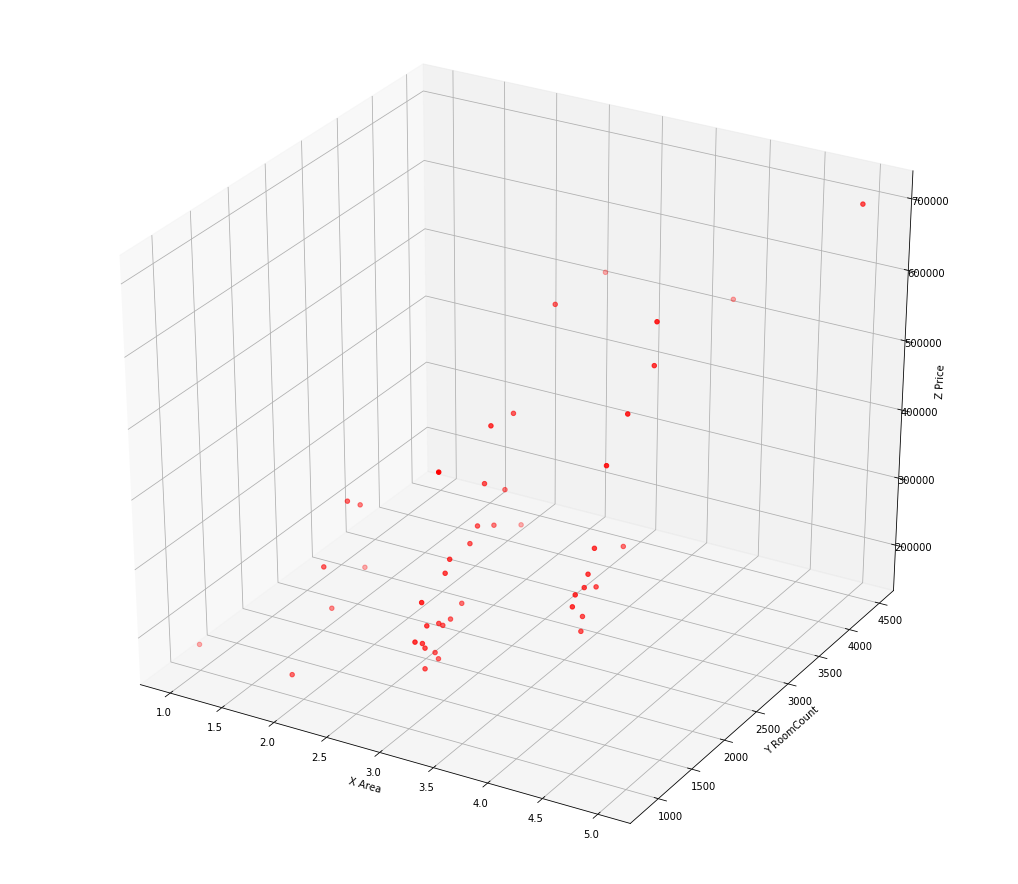

In [14]:

def show_plot():
    fig = plt.figure(figsize=(18, 16))
    ax = fig.add_subplot(111, projection='3d')
    print('initial data')
    ax.scatter(data.RoomCount, data.Area, data.Price, c='r', marker='o')
    ax.set_xlabel('X Area')
    ax.set_ylabel('Y RoomCount')
    ax.set_zlabel('Z Price')
    plt.show()


show_plot()

In [15]:

# task 7.1
# Произведите нормализацию признаков.


df = data
normalized_data = (df - df.min()) / (df.max() - df.min())
print("normalized head")
print(normalized_data.head())

normalized head
       Area  RoomCount     Price
0  0.345284       0.50  0.433962
1  0.206288       0.50  0.301887
2  0.426917       0.50  0.375660
3  0.155543       0.25  0.117170
4  0.592388       0.75  0.698113


In [ ]:

# task 7.2

# Повлияло ли это на скорость сходимости градиентного спуска? Ответ дайте в виде графика.


normalized_data cost function
regular cost function
costs head(last 5)
[1.483838664503587, 1.4143520313816322, 1.348438715571916, 1.285908072412492, 1.2265798386826812]
costs tail(last 5)
[0.05414863749250609, 0.053973482216053456, 0.053803998323570856, 0.05364000445505742, 0.05348132557840613]


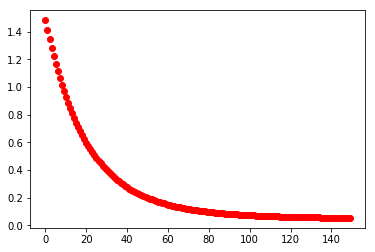

koefs
[0.37337692250869814, 0.6532001077511221, -0.06905567859836187]
denormalized_data cost function


c:\users\harwister\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in multiply
c:\users\harwister\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in double_scalars
c:\users\harwister\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in double_scalars
c:\users\harwister\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in double_scalars
c:\users\harwister\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in double_scalars


regular cost function
costs head(last 5)
[4608301025121981.0, 3.8967843491565355e+25, 3.328132594949761e+35, 2.8424625669641633e+45, 2.4276657296915424e+55]
costs tail(last 5)
[nan, nan, nan, nan, nan]


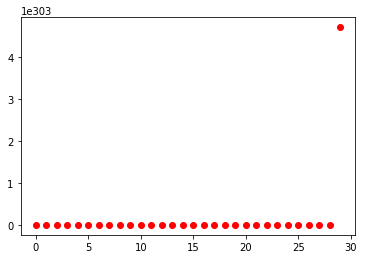

koefs
[nan, nan, nan]
result linear function model


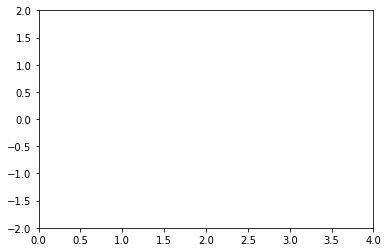

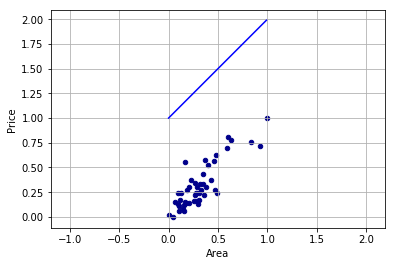

result linear function model


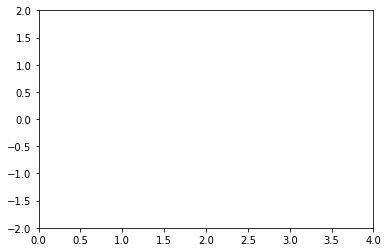

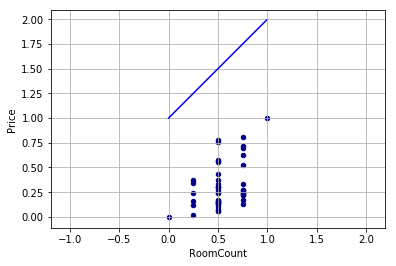

In [17]:
from matplotlib.animation import FuncAnimation

# task 8
# Реализуйте функции потерь J(θ) и градиентного спуска для случая многомерной линейной регрессии

# Regular Gradient
def Gradient(data, tetha_start = [1,1,1], alpha = -0.01, iterations = 150):
    tetha = np.array(tetha_start)
    tethas_history = [np.array(tetha_start)]
    costs = []
    x = np.array(data.iloc[:, 0:2])
    x1 = np.array(data.RoomCount)
    x2 = np.array(data.Area)
    y_actual = np.array(data.Price)
    for i in range(iterations):

        theroyes = [tetha[0] * x1_actual + x2_actual * tetha[1] + tetha[2] for x1_actual, x2_actual in zip(x1, x2)]
        sum_diff_x1 = 0
        sum_diff_x2 = 0
        sum_diff_b = 0
        for y_theory, y_actual, x1_actual, x2_actual in zip(theroyes, data.Price, data.RoomCount, data.Area):
            sum_diff_x1 += (y_theory - y_actual) * x1_actual * 2 / len(theroyes)
            sum_diff_x2 += (y_theory - y_actual) * x2_actual * 2 / len(theroyes)
            sum_diff_b += 2 * (y_theory - y_actual) / len(theroyes)
        sum_diff_x1 *= alpha
        sum_diff_x2 *= alpha
        sum_diff_b *= alpha
        tetha = [tetha[0] + sum_diff_x1, tetha[1] + sum_diff_x2, tetha[2] + sum_diff_b]
        tethas_history.append(tetha)
        y_theory = x.dot(tetha[0:2]) + tetha[2]
        j = 0.5 * ((y_theory - y_actual).T).dot((y_theory - y_actual))/len(y_theory)
        costs.append(j)
    print('regular cost function')
    plt.plot(range(len(costs)), costs, 'ro')
    print("costs head(last 5)")
    print(costs[:5])
    print("costs tail(last 5)")
    print(costs[-5:])
    plt.show()
    print("koefs")
    print(tethas_history[-1])
    return tethas_history
print("normalized_data cost function")



tetha = Gradient(normalized_data)

print("denormalized_data cost function")
Gradient(data, iterations=1500)

def ShowGradientResult(data, feature, tetha, tetha_ind, indicator ='b-'):
    x = np.arange(0, 1, 0.01)
    k = tetha[0]
    b = tetha[2]
    y = [i * k + b for i in x]
    print("result linear function model")
    plt.plot(x, y, indicator)




def ShowAnimatedGradientResult(data, feature, tetha, tetha_ind):
    fig = plt.figure()
    ax = plt.axes(xlim=(0, 4), ylim=(-2, 2))

    normalized_data.plot.scatter(x=feature, y='Price', c='DarkBlue')
    plt.grid()
    plt.axis('equal')
    x = np.arange(0, 1, 0.01)
    k = tetha[0][0]
    b = tetha[0][2]
    y = [i * k + b for i in x]
    print("result linear function model")
    line, = plt.plot(x, y, 'b-')

    def animate(i):
        x = np.arange(0, 1, 0.01)
        k = tetha[i][0]
        b = tetha[i][2]
        y = [i * k + b for i in x]
        line.set_data(x, y)
        return line,

    anim = FuncAnimation(fig, animate, frames=len(tetha), interval=20, blit=True, repeat=False)

    plt.show()
    plt.cla()
    plt.clf()
    plt.close()


ShowAnimatedGradientResult(normalized_data, 'Area', tetha, 1)
ShowAnimatedGradientResult(normalized_data, 'RoomCount', tetha, 0)

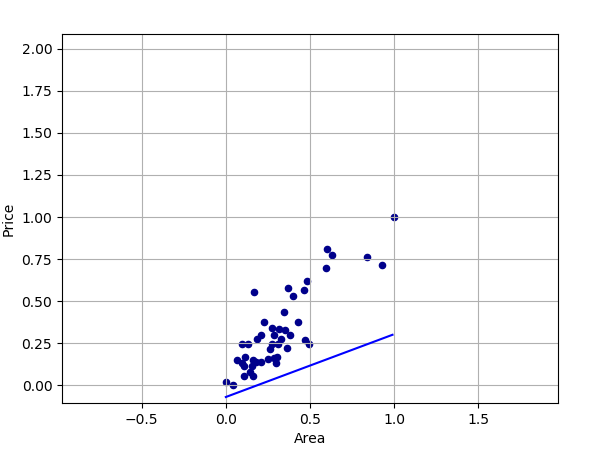

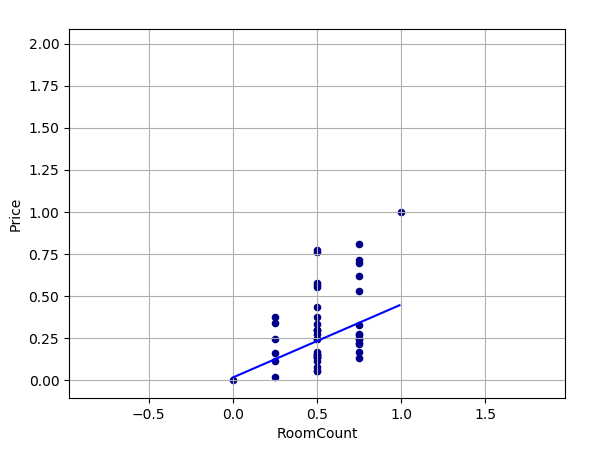

vectorized cost function
costs head(last 5)
[0.17165261454222386, 0.17018906246382567, 0.16873874708492856, 0.16730154859764626, 0.1658773482785399]
costs tail(last 5)
[0.05314803072266046, 0.05275562463821956, 0.05236676040703475, 0.05198140597449124, 0.05159952957611665]


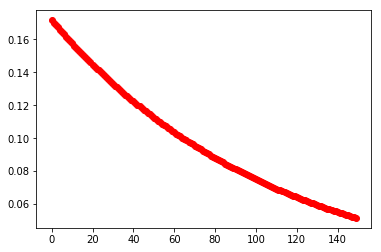

tetha
[0.78902327 0.6374514 ]


In [18]:

# vectorized descent
# task 8.2
# градиентного спуска для случая многомерной линейной регрессии с использованием векторизации.

def VectorizedGradient(X, Y, theta, iterations=150, alpha=-0.01):
    thetas = [theta]
    costs = []
    for i in range(iterations):
        theta += alpha * ((X.dot(theta) - Y).T.dot(X)).T / len(Y)
        thetas.append(theta)
        cost = (X.dot(theta) - Y).T.dot(X.dot(theta) - Y) / (2 * len(X))
        if len(costs) == 0 or cost < costs[-1]:
            costs.append(cost)
    print("vectorized cost function")
    plt.plot(range(len(costs)), costs, 'ro')
    print("costs head(last 5)")
    print(costs[:5])
    # task 9 Покажите, что векторизация дает прирост производительности.
    # сходится быстрее при одинаковых параметрах
    print("costs tail(last 5)")
    print(costs[-5:])
    plt.show()
    print("tetha")
    print(thetas[-1])


X = np.array(normalized_data.iloc[:, 0:2])
Y = np.array(normalized_data.Price)
theta = [1, 1]
# task 9
# Покажите, что векторизация дает прирост производительности.

VectorizedGradient(X, Y, theta)

regular cost function
costs head(last 5)
[1.483838664503587, 1.4143520313816322, 1.348438715571916, 1.285908072412492, 1.2265798386826812]
costs tail(last 5)
[0.05414863749250609, 0.053973482216053456, 0.053803998323570856, 0.05364000445505742, 0.05348132557840613]


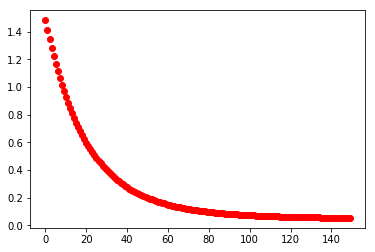

koefs
[0.37337692250869814, 0.6532001077511221, -0.06905567859836187]
regular cost function
costs head(last 5)
[1.483838664503587, 1.4143520313816322, 1.348438715571916, 1.285908072412492, 1.2265798386826812]
costs tail(last 5)
[0.06382591080234216, 0.06383665281910528, 0.06384739277339395, 0.06385813066490524, 0.06386886649333699]


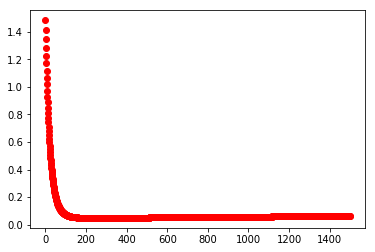

koefs
[0.21001162608470994, 0.7594244065113257, -0.03427421538774822]
regular cost function
costs head(last 5)
[0.9045120623425623, 0.5459507946680531, 0.34514485860116884, 0.2301357363121972, 0.16258592971177638]
costs tail(last 5)
[0.1025390237481926, 0.10254075932224847, 0.10254248915503794, 0.10254421326548718, 0.10254593167246061]


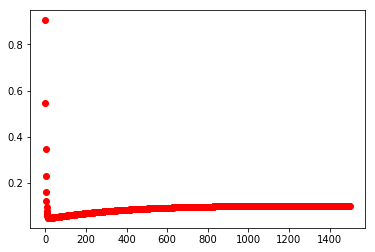

koefs
[-0.06284370262988882, 0.9502553058356499, 0.05476969794480501]
result linear function model
result linear function model


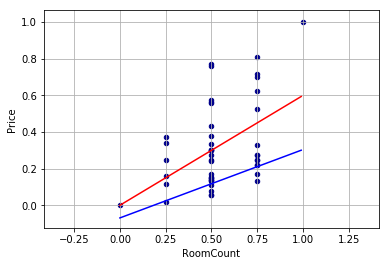

In [19]:

# task 10
# Попробуйте изменить параметр ɑ (коэффициент обучения). Как при этом изменяется график функции потерь в зависимости от числа итераций градиентного спуск? Результат изобразите в качестве графика.


Gradient(normalized_data, alpha = -0.01, iterations = 150)

Gradient(normalized_data, alpha = -0.01, iterations = 1500)

Gradient(normalized_data, alpha = -0.1, iterations = 1500)

analytics_tetha = [0.6, 0.95, 0.0]
normalized_data.plot.scatter(x='RoomCount', y='Price', c='DarkBlue')
plt.grid()
plt.axis('equal')
ShowGradientResult(normalized_data, 'RoomCount', tetha[-1],0)
ShowGradientResult(normalized_data, 'RoomCount', analytics_tetha,0, indicator='r-')
plt.show()


result linear function model
result linear function model


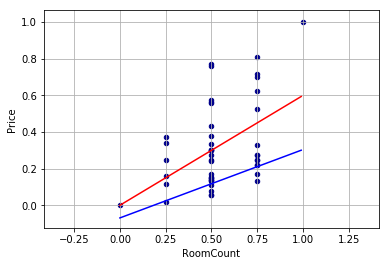

In [20]:
normalized_data.plot.scatter(x='RoomCount', y='Price', c='DarkBlue')
plt.grid()
plt.axis('equal')
ShowGradientResult(normalized_data, 'Area', tetha[-1],1)
ShowGradientResult(normalized_data, 'Area', analytics_tetha,1, 'r-')
plt.show()
# task 11
